<a href="https://colab.research.google.com/github/Saikumar1422/Cardivascular-disease-prediction/blob/main/cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT NAME**

# **CARDIVASCULAR RISK PREDICTION**

# **PROJECT SUMMARY**
**Data Description**
*Demographic*:
Sex: male or female("M" or "F")
Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
**Behavioral**
is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical** *( history)*`


BP Meds: whether or not the patient was on blood pressure medication (Nominal)
Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

Tot Chol: total cholesterol level (Continuous)
Sys BP: systolic blood pressure (Continuous)
Dia BP: diastolic blood pressure (Continuous)
BMI: Body Mass Index (Continuous)
Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

Glucose: glucose level (Continuous)
Predict variable (desired target)

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -


# **GITHUB LINK**

# **PROBLEM STATEMENT**

The cardivaascular data consists of set of columns that speaks about qhether the patient is suffering from heart disease or  not 

first we have to load the dataset and by understanding the datsaset with the meaningfull feattures and rows we perform the model

there are **3390** rows and **16** columns with in the dataset

**age**:Speaks about the age of the patient

**education**	: shows the education thet the patient done in four different phases 1. schooling,2.intermediate,3.UG,4.PG

**sex**:Represents whether the patient is male or female

**is_smoking**:Represents whether the patient is smoking orr not

**cigsPerDay**:If smoking then how many cigarss the patient can atke per a day

**BPMeds**	is there bp in thee patient

**prevalentStroke**	is there any previous stroke in the patient

**diabetes**: Is the patient suffeing with diabetes

**totChol**	:Total cholestrol

**sysBP**	:SYStollic blood pressure

**diaBP**	:Diastollic blood pressure

**BMI**	:body mass indeex

**heartRate**	:repesents the heart rate of the patient

**glucose**	:glucose levels of the patient

**TenYearCHD**:Predicting ten yyear coronary heart disease with in the patient

# **LETS BEGIN**

In [ ]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
# from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## ***1. Know Your Data***

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/data_cardiovascular_risk.csv",index_col='id')
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 16)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [ ]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


## ***2. Understanding Your Variables***

In [ ]:
null_values=df.isnull().sum()
null_values

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
nan=df.isnull()
nan

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3386,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:ylabel='id'>

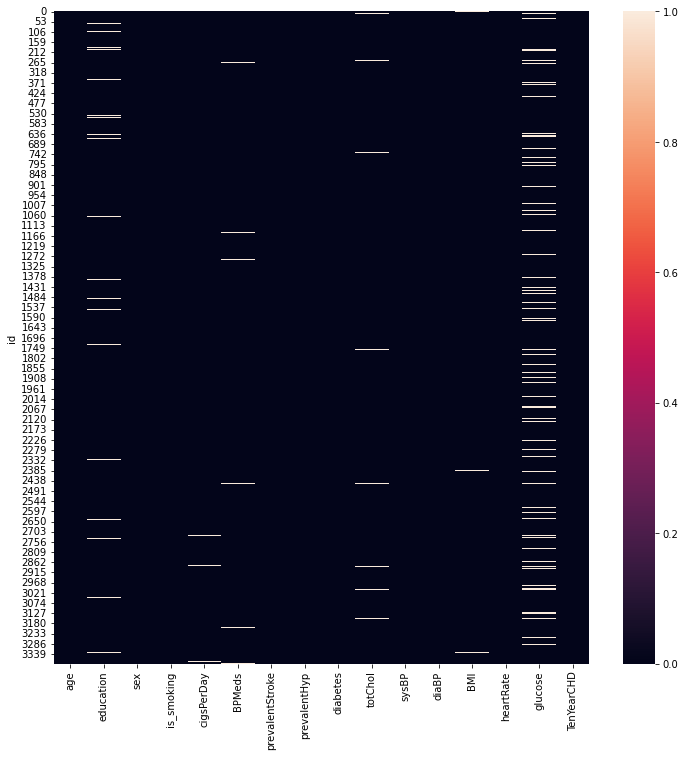

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(nan)

In [ ]:
df.dropna(inplace=True)

In [ ]:
nan=df.isnull()

<AxesSubplot:ylabel='id'>

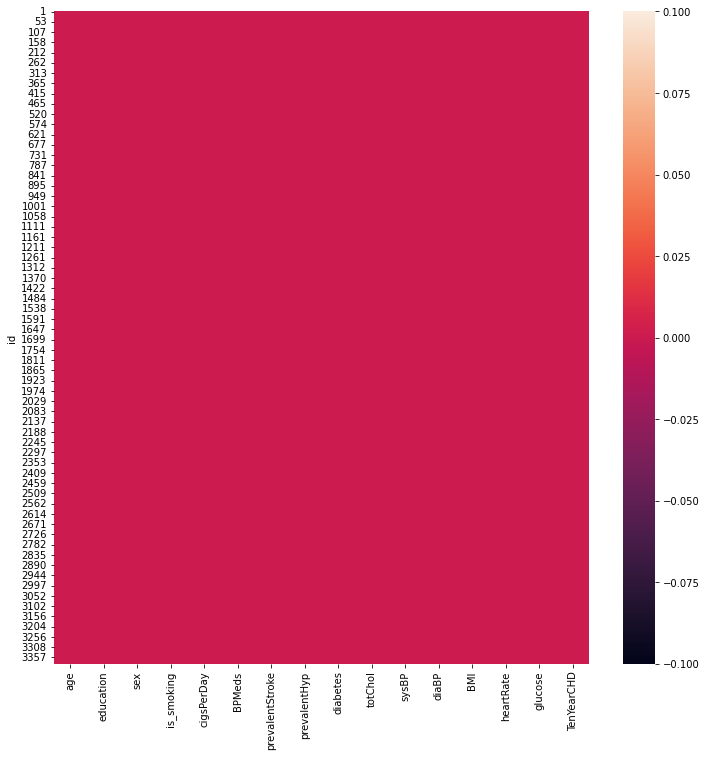

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(nan)

there are no null values with ion the data set 

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

<AxesSubplot:>

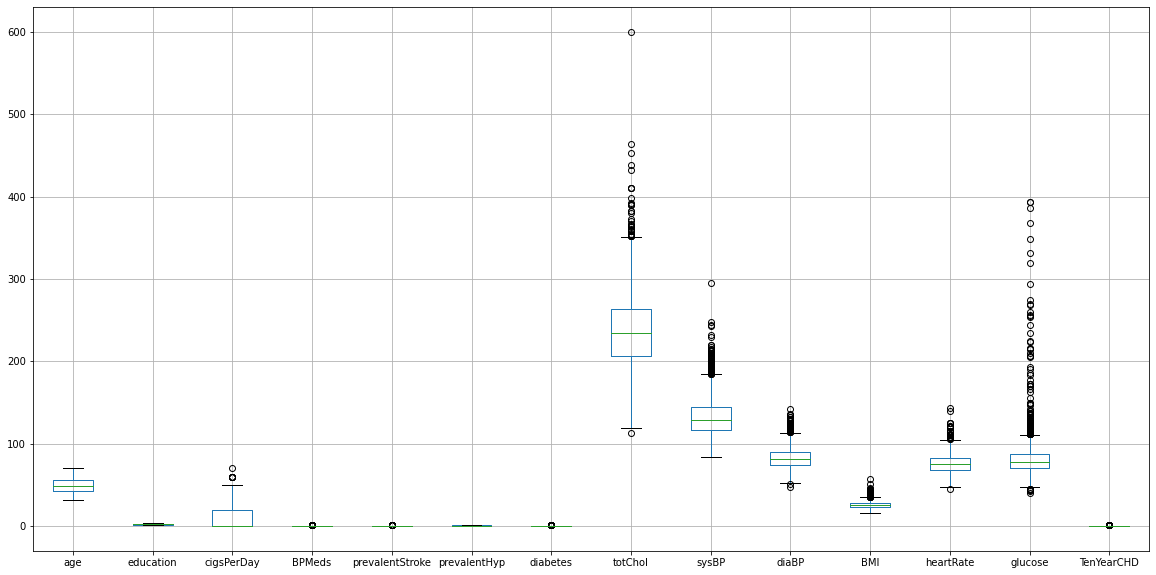

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot()


<AxesSubplot:>

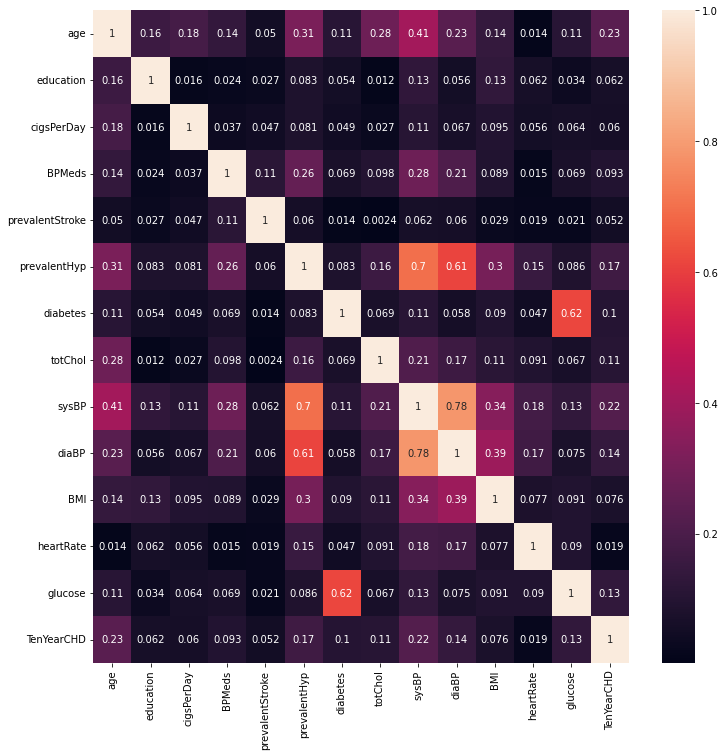

In [ ]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)


There is no significant correlation between independent and dependent varibles 

but there is nhigh correlation between independent variables

# ANALYSING THE CATEGORICAL FEATURES

## 1.**which gender is prone to coronary heart disease**

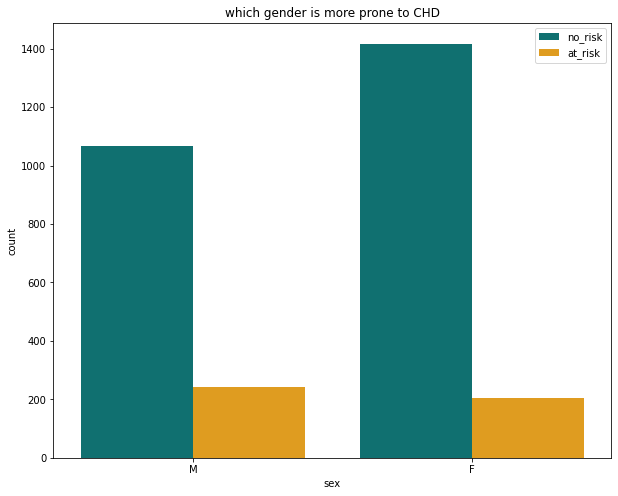

In [ ]:
my_palette={0:'teal',1:'orange'}
plt.figure(figsize=(10,8))
sns.countplot(df['sex'],hue=df['TenYearCHD'],palette=my_palette)
plt.title('which gender is more prone to CHD')
plt.legend(['no_risk','at_risk'])
plt.show()

By the graph we intend that females are less effective of disease when compared to males

## 2.**Are diabetic patients at more risk of coronary heart disease**


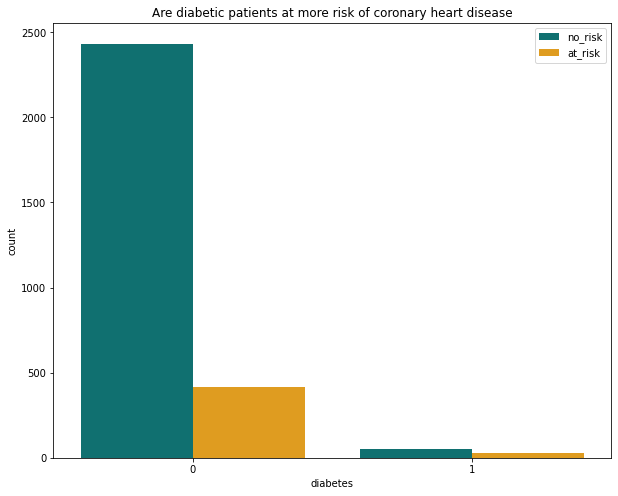

In [ ]:
my_palette={0:'teal',1:'orange'}
plt.figure(figsize=(10,8))
sns.countplot(df['diabetes'],hue=df['TenYearCHD'],palette=my_palette)
plt.title('Are diabetic patients at more risk of coronary heart disease')
plt.legend(['no_risk','at_risk'])
plt.show()

we representts the diabetic patients at more risk of coronary heart disease

0 indicates tenyearCHD occurs and 1 indicates not

here we ca see that diabetes patients are more serioiusly occurs with CHD

## 3.**Are smokers patients at more risk of coronary heart disease**


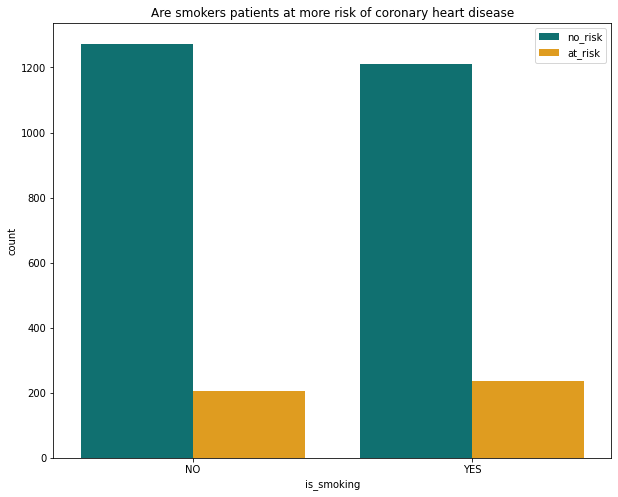

In [ ]:
my_palette={0:'teal',1:'orange'}
plt.figure(figsize=(10,8))
sns.countplot(df['is_smoking'],hue=df['TenYearCHD'],palette=my_palette)
plt.title('Are smokers patients at more risk of coronary heart disease')
plt.legend(['no_risk','at_risk'])
plt.show()

WE compared that smoking effects the CHD then we noptices that

there is no relation of smoiking causes tha CHD by this graph

# 4.**Are hypertensive patients at more risk of coronary heart disease**


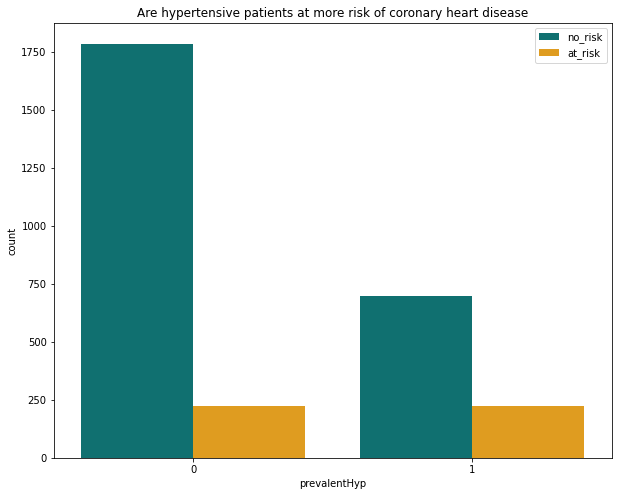

In [ ]:
my_palette={0:'teal',1:'orange'}
plt.figure(figsize=(10,8))
sns.countplot(df['prevalentHyp'],hue=df['TenYearCHD'],palette=my_palette)
plt.title('Are hypertensive patients at more risk of coronary heart disease')
plt.legend(['no_risk','at_risk'])
plt.show()

by this hypertensive patients at not at all more risk of coronary heart disease by prevlenthyp

it doesn't occurs difference among them

# 5.**Are patients with blood pressure on mediacation at more risk of coronary heart disease**


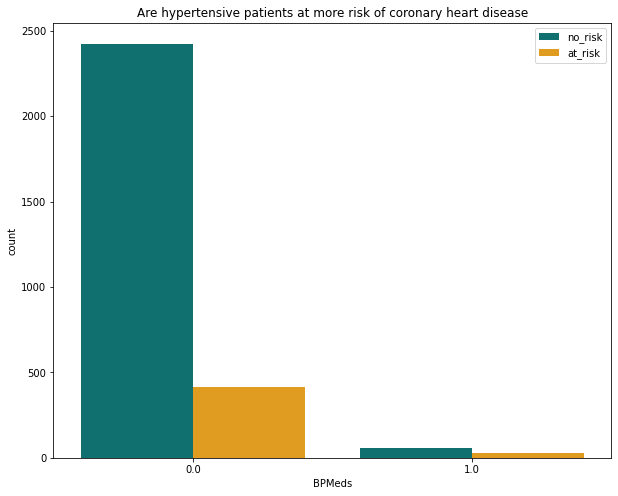

In [ ]:
my_palette={0:'teal',1:'orange'}
plt.figure(figsize=(10,8))
sns.countplot(df['BPMeds'],hue=df['TenYearCHD'],palette=my_palette)
plt.title('Are hypertensive patients at more risk of coronary heart disease')
plt.legend(['no_risk','at_risk'])
plt.show()

Patience with bloodpressure can indicatsthe symlptoms of occuring the CHD

theres almost equal chancewsn oif getiing the CHD with BP

# 6.**Which Age group is more vulnerable to coronary heart disease ?**



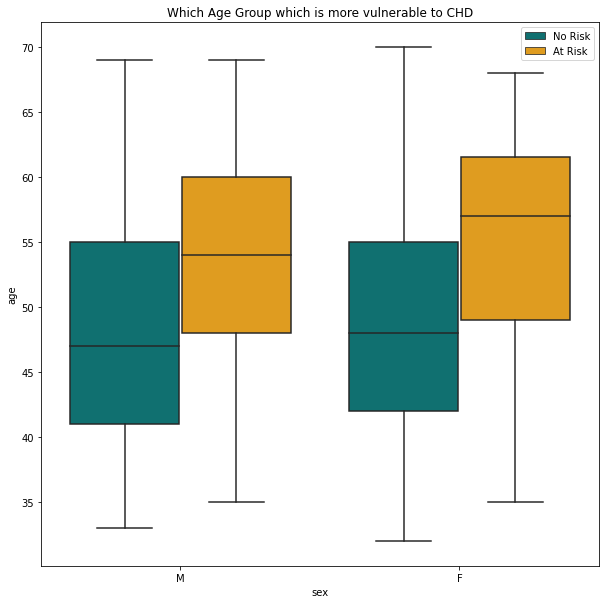

In [ ]:
plt.figure(figsize = (10,10))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

By this males are mostky effected by the CHD

# 7.**Are Total Cholestrol levels related to coronary heart disease ??**

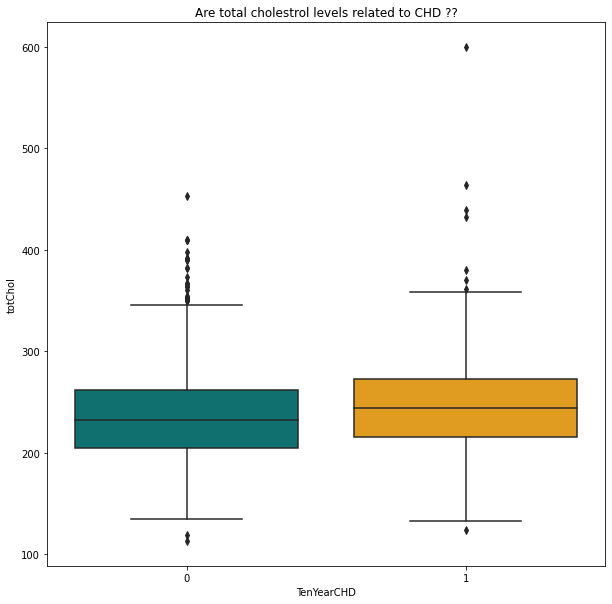

In [ ]:

plt.figure(figsize = (10,10))
sns.boxplot(df['TenYearCHD'], df['totChol'], palette = my_palette)
plt.title("Are total cholestrol levels related to CHD ??")
plt.show()

This indicates that cholestrol level is not the sole deciding factor for predicting whether the person gets coronary heart disease or not. People with similar levels of cholestrol have got coronary heart disease as well as are free from coronary heart disease. Clearly, there is no direct correlation of coronary heart disease with the cholestrol level.



# **Is Heart rate is responsible for CHD ??**

In [ ]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value
     

In [ ]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)


In [ ]:
df['heartRateLabel'].value_counts


<bound method IndexOpsMixin.value_counts of id
1       Normal
2       Normal
3       Normal
4       Normal
5       Normal
         ...  
3384      High
3385    Normal
3386    Normal
3387    Normal
3389    Normal
Name: heartRateLabel, Length: 2927, dtype: object>

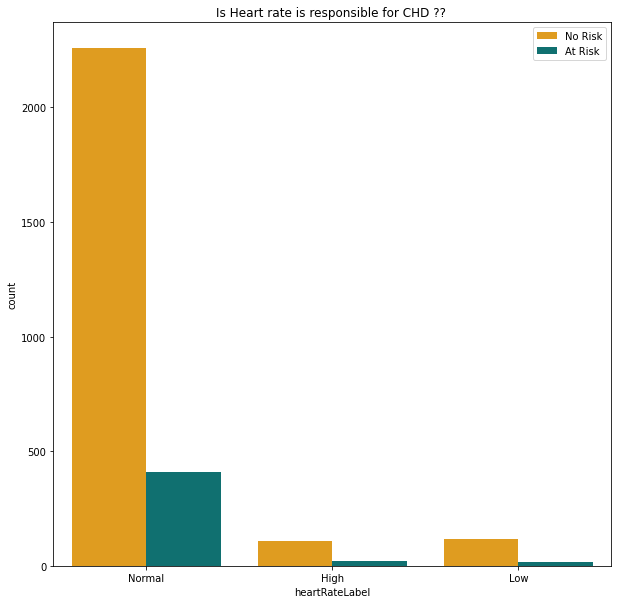

In [ ]:

plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

yes heart rate is somewhat resposible for the CHD in some situaions

In [ ]:
df.drop(columns=['heartRateLabel'], inplace=True)


# how much smoking affect CHD?



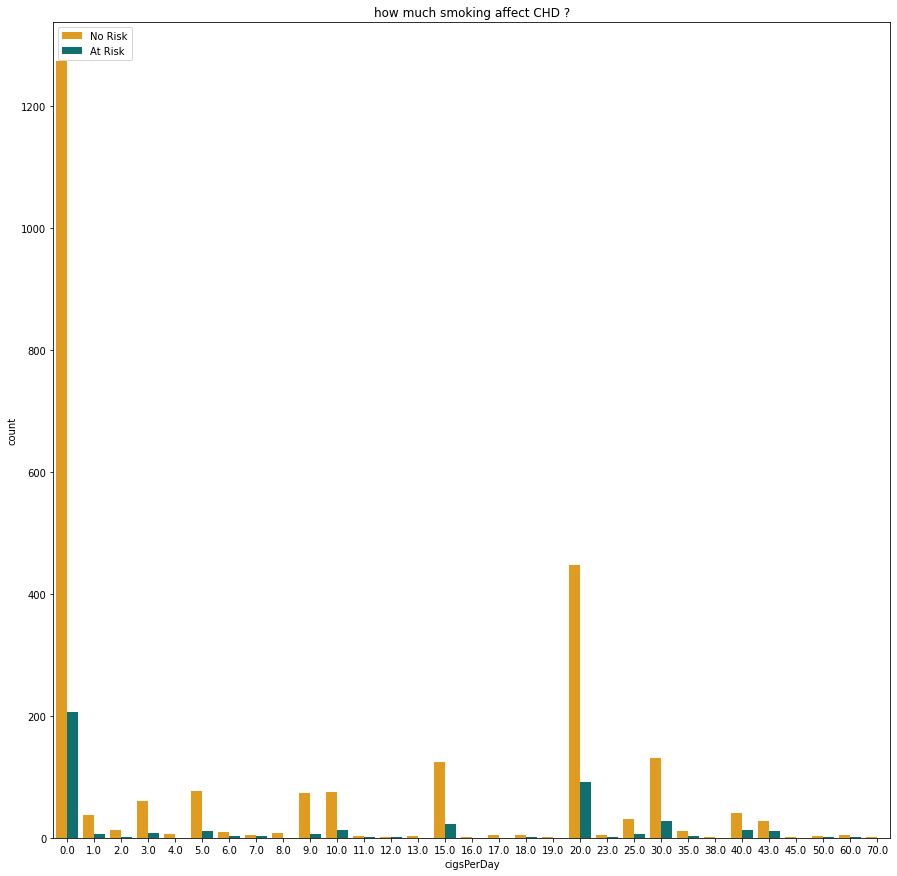

In [ ]:

plt.figure(figsize = (15,15))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['cigsPerDay'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("how much smoking affect CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

# Whether a person who had a stroke earlier more prone to CHD?



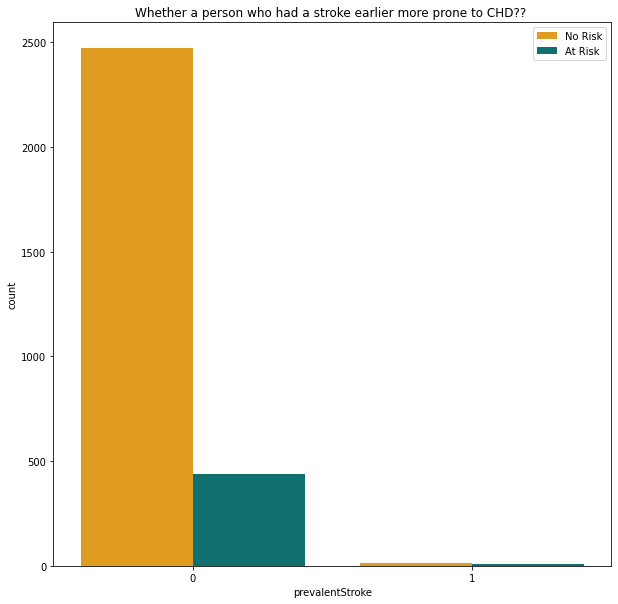

In [ ]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

thhe data says that the person with stroke earlier more prone to CHD is almost ttrue in the cases

### Are patients with systolic BP at risk of CHD?



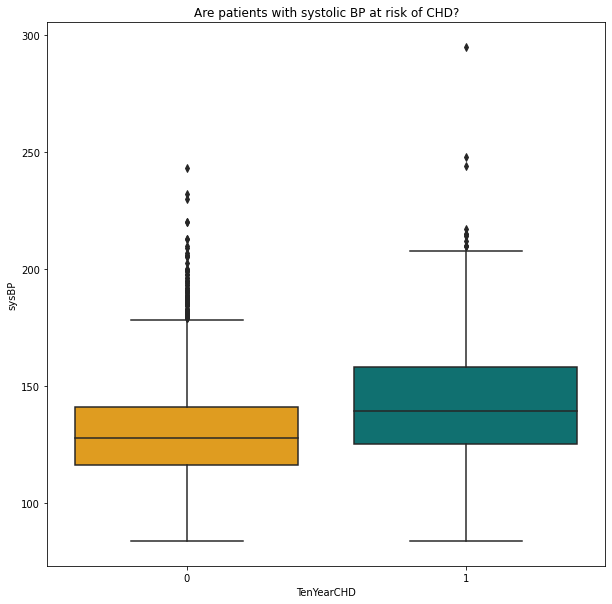

In [ ]:

plt.figure(figsize = (10,10))
sns.boxplot(df['TenYearCHD'], df['sysBP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

# Are patients with Diastolic BP at risk of CHD?



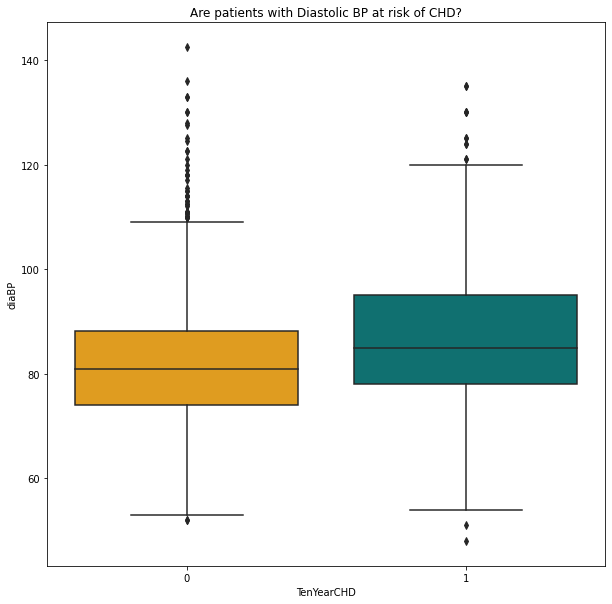

In [ ]:
plt.figure(figsize = (10,10))
sns.boxplot(df['TenYearCHD'], df['diaBP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


# Is patients BMI important to show the risk of CHD?



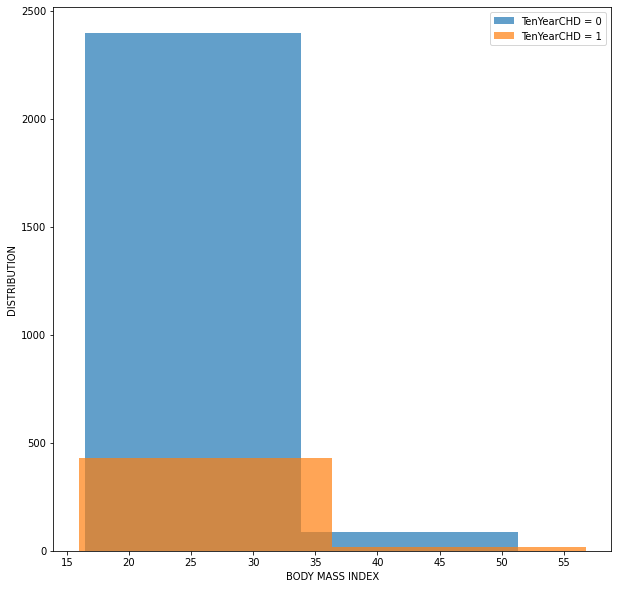

In [ ]:

plt.figure(figsize=(10,10))

plt.hist(df['BMI'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(df['BMI'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('BODY MASS INDEX')
plt.legend()


# Can patients Glucose levels show the risk of CHD?



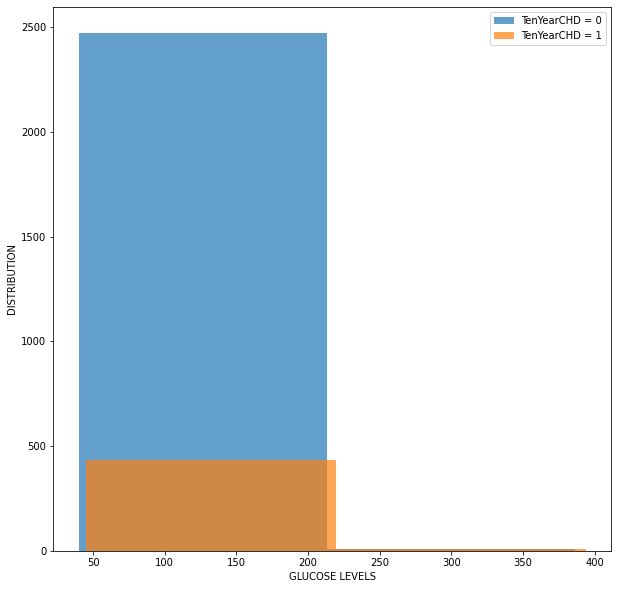

In [ ]:
plt.figure(figsize=(10,10))

plt.hist(df['glucose'][df['TenYearCHD'] == 0], bins=2, alpha = 0.7, label = 'TenYearCHD = 0')
plt.hist(df['glucose'][df['TenYearCHD'] == 1], bins=2, alpha = 0.7, label = 'TenYearCHD = 1')
plt.ylabel('DISTRIBUTION')
plt.xlabel('GLUCOSE LEVELS')
plt.legend()

## **MODEL BUILDING**

FEATURE ENGINEERING

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension.



In [ ]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [ ]:

df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
id,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7


Blood glucose levels can be used to classify the severity of Diabetes.



In [ ]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'    
     


In [ ]:

df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
id,,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1


The absolute number of cigarettes per day is not much useful variable because the stiffness of blood vessels increases as the number of cigarettes consumed per day increases. So new feature containing log-transformed value could be more useful.

In [ ]:
df['SmokingFactor'] = df['cigsPerDay'].apply(lambda x: 0 if x < 1 else np.log(x))
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,,,,,,,,,,
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1,0.000000
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1,2.302585
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1,2.995732
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1,3.401197
5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1,0.000000


In [ ]:
# remove not useful columns
df.drop(columns=['prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking', 'cigsPerDay'], inplace=True)

<AxesSubplot:>

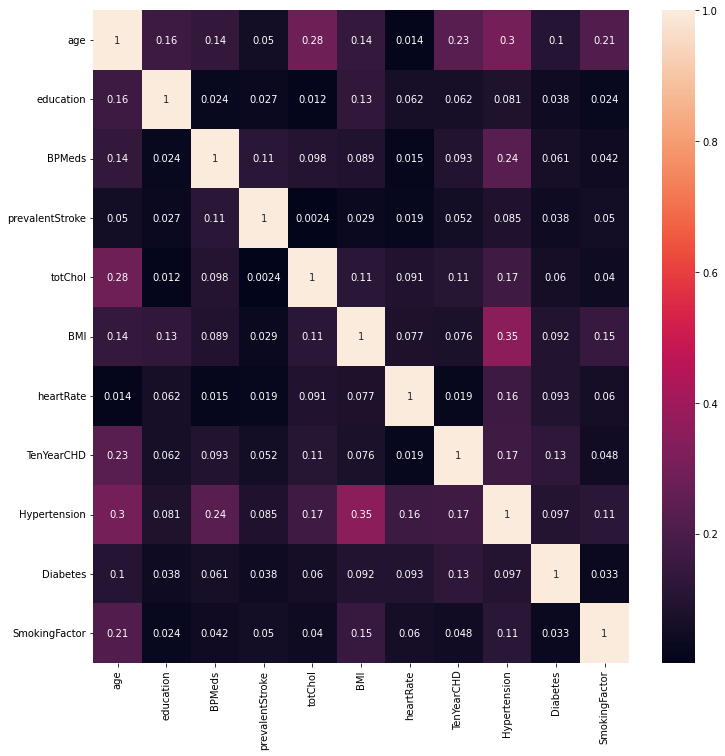

In [ ]:

# Plotting the correlation matrix using heatmap
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)
     

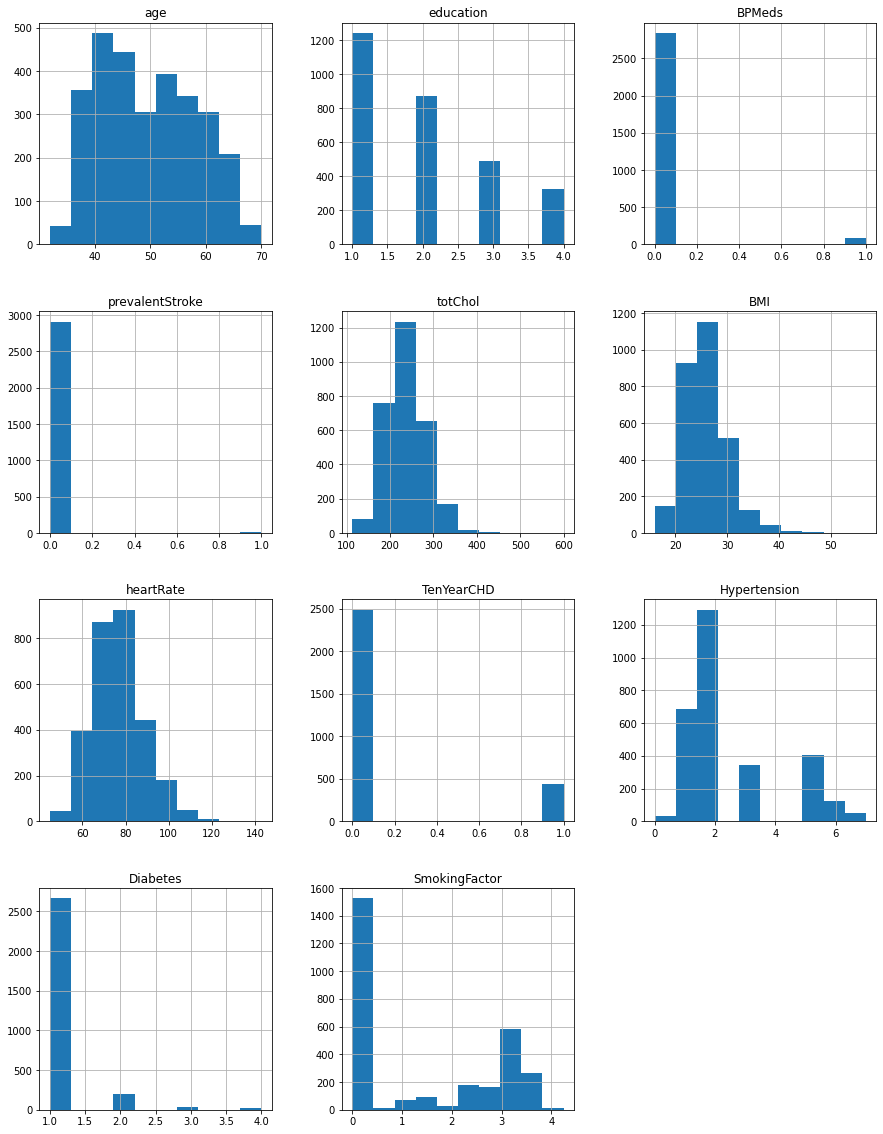

In [ ]:

# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

BPMeds and prevalentStroke does not help in explaining variance so we can remove those columns.



In [ ]:

# remove not useful columns
df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2927 non-null   int64  
 1   education      2927 non-null   float64
 2   sex            2927 non-null   object 
 3   totChol        2927 non-null   float64
 4   BMI            2927 non-null   float64
 5   heartRate      2927 non-null   float64
 6   TenYearCHD     2927 non-null   int64  
 7   Hypertension   2927 non-null   int64  
 8   Diabetes       2927 non-null   int64  
 9   SmokingFactor  2927 non-null   float64
dtypes: float64(5), int64(4), object(1)
memory usage: 251.5+ KB


In [ ]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)


In [ ]:
df.head()

,age,education,sex,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes,SmokingFactor
id,,,,,,,,,,
1,36,4.0,1,212.0,29.77,72.0,0,5,1,0.000000
2,46,1.0,0,250.0,20.35,88.0,0,1,1,2.302585
3,50,1.0,1,233.0,28.26,68.0,1,3,1,2.995732
4,64,1.0,0,241.0,26.42,70.0,0,2,1,3.401197
5,61,3.0,0,272.0,32.80,85.0,1,7,1,0.000000


In [ ]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes', 'SmokingFactor']


# **Hypothesis testing**

In [ ]:

X = df[independent_variable].values
y = df[dependent_variable].values
     


Let's Resample the dataset to over come this imbalance. We will apply SMOTE (Synthetic Minority Oversampling Technique) to resample the data. It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [ ]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)
     

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [ ]:

# split the data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)


In [ ]:

# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# **ML model implementation**

# **KNN**

In [ ]:

# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test) 

In [ ]:

# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96670397 0.91494124 0.90598769 0.87101287 0.8662563
 0.8452714  0.83911584 0.82288752 0.81729155]
Test Accuracy:  [0.85682327 0.83333333 0.80089485 0.77964206 0.76845638 0.75055928
 0.75727069 0.74720358 0.74272931 0.72595078]


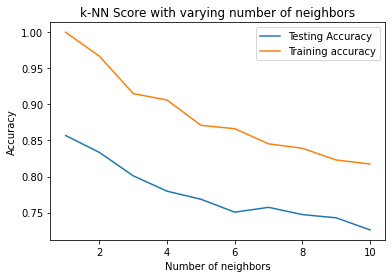

In [ ]:

# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Webcan see that test score is increasing as number of neighbours increases.

Let's try to find best parameter for knn.

In [ ]:
param_grid = {'n_neighbors':np.arange(1,50)}


In [ ]:

knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_


0.841915731327496

In [ ]:
knn_cv.best_params_


{'n_neighbors': 1}

In [ ]:

# predictions
knn_predict = knn_cv.predict(X_test)


In [ ]:
print(classification_report(y_test,knn_predict))


              precision    recall  f1-score   support

           0       0.93      0.80      0.86       481
           1       0.80      0.93      0.86       413

    accuracy                           0.86       894
   macro avg       0.86      0.86      0.86       894
weighted avg       0.87      0.86      0.86       894



## **Logistic Regression**


In [ ]:

# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
 #Get the model coefficients
logistic_regression_model.coef_


array([[ 0.68631868, -0.09823394,  0.26131522,  0.14457327, -0.0152453 ,
        -0.07747589,  0.28443718,  0.24385498,  0.28862723]])

In [ ]:

# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [ ]:

# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6841074426412983
The accuracy on test data is  0.6722595078299777


[[1496  505]
 [ 624  949]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

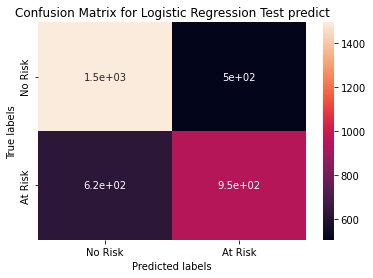

In [ ]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Logistic Regression Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
     


[[353 128]
 [165 248]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

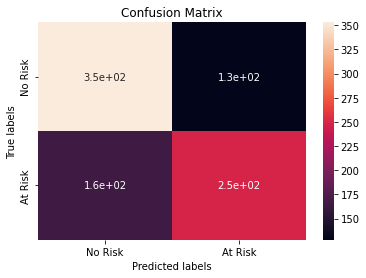

In [ ]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:

# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6671859976944723
Accuracy score: 0.6722595078299777
              precision    recall  f1-score   support

           0       0.71      0.75      0.73      2001
           1       0.65      0.60      0.63      1573

    accuracy                           0.68      3574
   macro avg       0.68      0.68      0.68      3574
weighted avg       0.68      0.68      0.68      3574



              precision    recall  f1-score   support

           0       0.68      0.73      0.71       481
           1       0.66      0.60      0.63       413

    accuracy                           0.67       894
   macro avg       0.67      0.67      0.67       894
weighted avg       0.67      0.67      0.67       894



#**Building Desicion Tree Model**


Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.



In [ ]:

# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)


Predicting on test cell and train cell


In [ ]:

train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [ ]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 79.30648769574944
the training accuracy is 83.29602686066032


[Text(0.35138888888888886, 0.9583333333333334, 'x[0] <= -0.595\nentropy = 0.99\nsamples = 3574\nvalue = [2001, 1573]'),
 Text(0.07777777777777778, 0.875, 'x[8] <= -0.94\nentropy = 0.751\nsamples = 1194\nvalue = [937, 257]'),
 Text(0.05555555555555555, 0.7916666666666666, 'entropy = 0.347\nsamples = 431\nvalue = [403, 28]'),
 Text(0.1, 0.7916666666666666, 'x[8] <= -0.213\nentropy = 0.881\nsamples = 763\nvalue = [534, 229]'),
 Text(0.07777777777777778, 0.7083333333333334, 'entropy = 0.378\nsamples = 41\nvalue = [3, 38]'),
 Text(0.12222222222222222, 0.7083333333333334, 'x[0] <= -1.41\nentropy = 0.834\nsamples = 722\nvalue = [531, 191]'),
 Text(0.06666666666666667, 0.625, 'x[3] <= -1.379\nentropy = 0.584\nsamples = 200\nvalue = [172, 28]'),
 Text(0.044444444444444446, 0.5416666666666666, 'x[3] <= -1.719\nentropy = 0.947\nsamples = 41\nvalue = [26, 15]'),
 Text(0.022222222222222223, 0.4583333333333333, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.06666666666666667, 0.45833333333

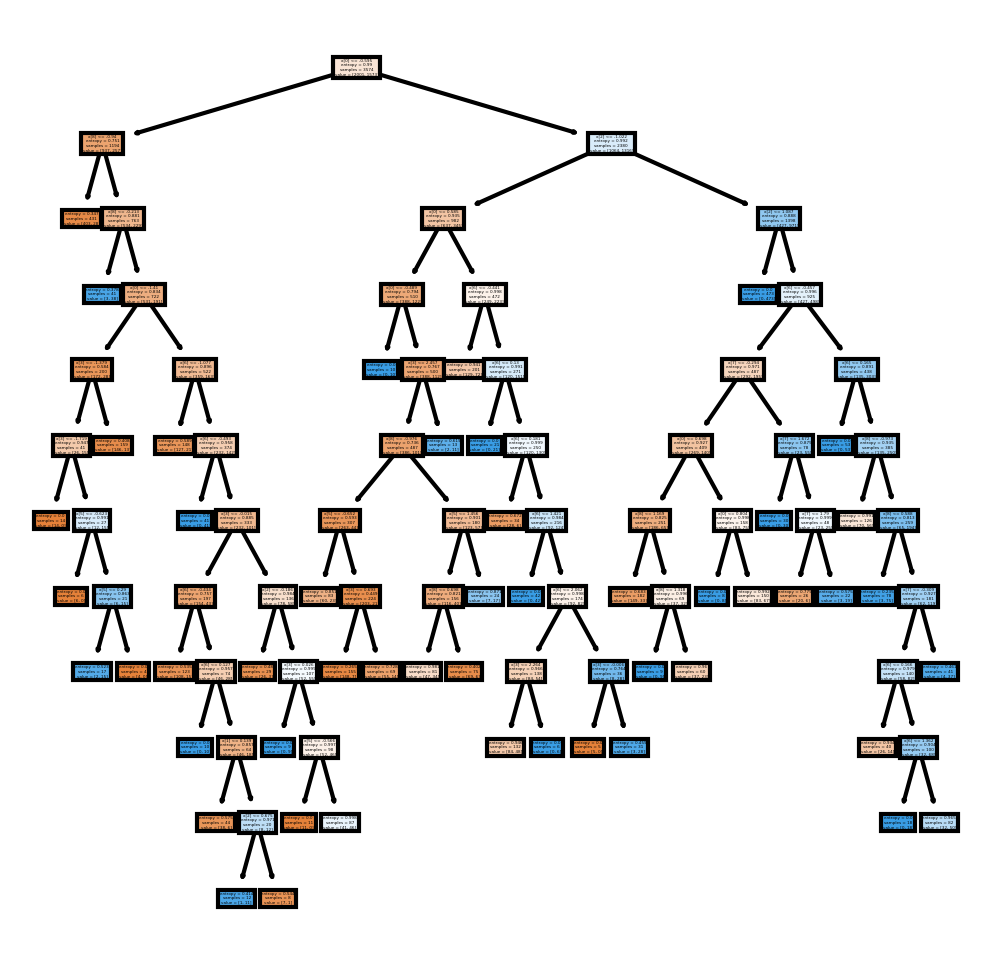

In [ ]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1900  101]
 [ 496 1077]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

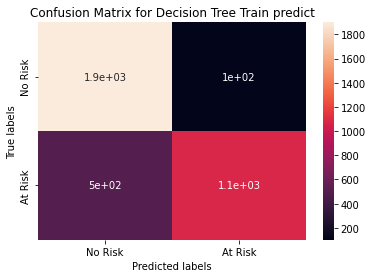

In [ ]:

#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[445  36]
 [149 264]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

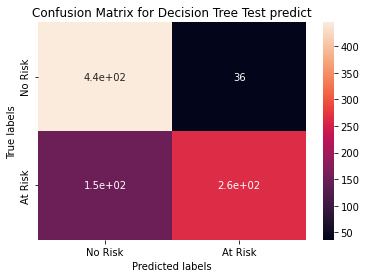

In [ ]:

#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:

#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86      2001
           1       0.91      0.68      0.78      1573

    accuracy                           0.83      3574
   macro avg       0.85      0.82      0.82      3574
weighted avg       0.85      0.83      0.83      3574



In [ ]:

#classification report for test
print(classification_report(y_test, test_preds))
     

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       481
           1       0.88      0.64      0.74       413

    accuracy                           0.79       894
   macro avg       0.81      0.78      0.78       894
weighted avg       0.81      0.79      0.79       894



Building Ensembles of Decision Tree


In [ ]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')


In [ ]:
classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [ ]:

train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)


0.9952434247341914

In [ ]:
accuracy_score(y_test,test_preds)


0.8870246085011185

In [ ]:
roc_auc_score(y_test,test_preds)


0.8813181779283474

In [ ]:
roc_auc_score(y_train,train_preds)


0.994596312778131

[[2001    0]
 [  17 1556]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

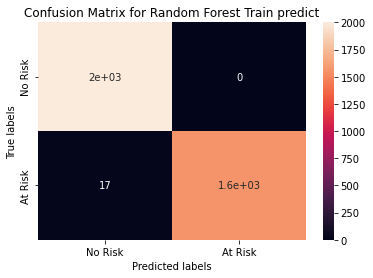

In [ ]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[460  21]
 [ 80 333]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

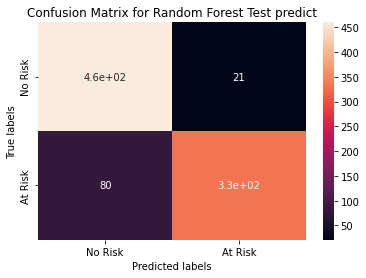

In [ ]:

#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2001
           1       1.00      0.99      0.99      1573

    accuracy                           1.00      3574
   macro avg       1.00      0.99      1.00      3574
weighted avg       1.00      1.00      1.00      3574



In [ ]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       481
           1       0.94      0.81      0.87       413

    accuracy                           0.89       894
   macro avg       0.90      0.88      0.88       894
weighted avg       0.89      0.89      0.89       894



In [ ]:

# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [ ]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [ ]:
gradientBC.fit(X_train,y_train)


GradientBoostingClassifier()

In [ ]:

train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)


0.902070509233352

In [ ]:
accuracy_score(y_test,test_preds)


0.8702460850111857

In [ ]:
roc_auc_score(y_test,test_preds)


0.8629872189194223

In [ ]:
roc_auc_score(y_train,train_preds)


0.8917391272577316

[[1957   44]
 [ 306 1267]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

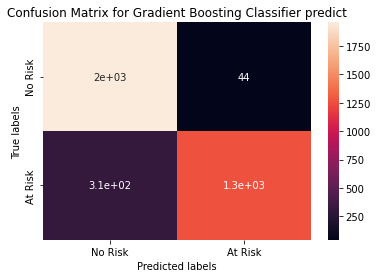

In [ ]:

#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[461  20]
 [ 96 317]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

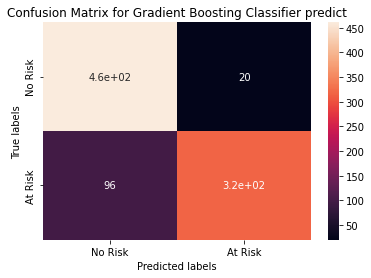

In [ ]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:

print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       481
           1       0.94      0.77      0.85       413

    accuracy                           0.87       894
   macro avg       0.88      0.86      0.87       894
weighted avg       0.88      0.87      0.87       894



              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2001
           1       0.97      0.81      0.88      1573

    accuracy                           0.90      3574
   macro avg       0.92      0.89      0.90      3574
weighted avg       0.91      0.90      0.90      3574



In [ ]:

#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [ ]:
xg_cla.fit(X_test,y_test)


XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [ ]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)


In [ ]:
accuracy_score(y_train,train_preds)


0.7929490766648013

In [ ]:
accuracy_score(y_test,test_preds)


0.8344519015659956

In [ ]:
roc_auc_score(y_test,test_preds)


0.8268135895254539

In [ ]:
roc_auc_score(y_train,train_preds)

0.778378452223348

[[1801  200]
 [ 540 1033]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

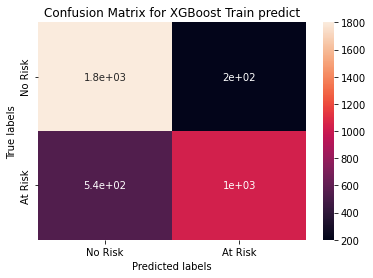

In [ ]:

#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[446  35]
 [113 300]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

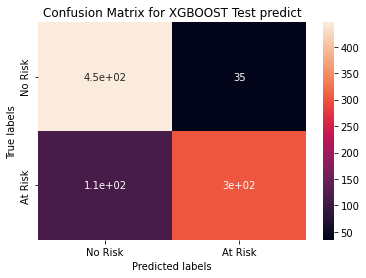

In [ ]:

#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classification Report For train and test



In [ ]:

print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))
     

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       481
           1       0.90      0.73      0.80       413

    accuracy                           0.83       894
   macro avg       0.85      0.83      0.83       894
weighted avg       0.84      0.83      0.83       894



              precision    recall  f1-score   support

           0       0.77      0.90      0.83      2001
           1       0.84      0.66      0.74      1573

    accuracy                           0.79      3574
   macro avg       0.80      0.78      0.78      3574
weighted avg       0.80      0.79      0.79      3574



#Visualising the tree



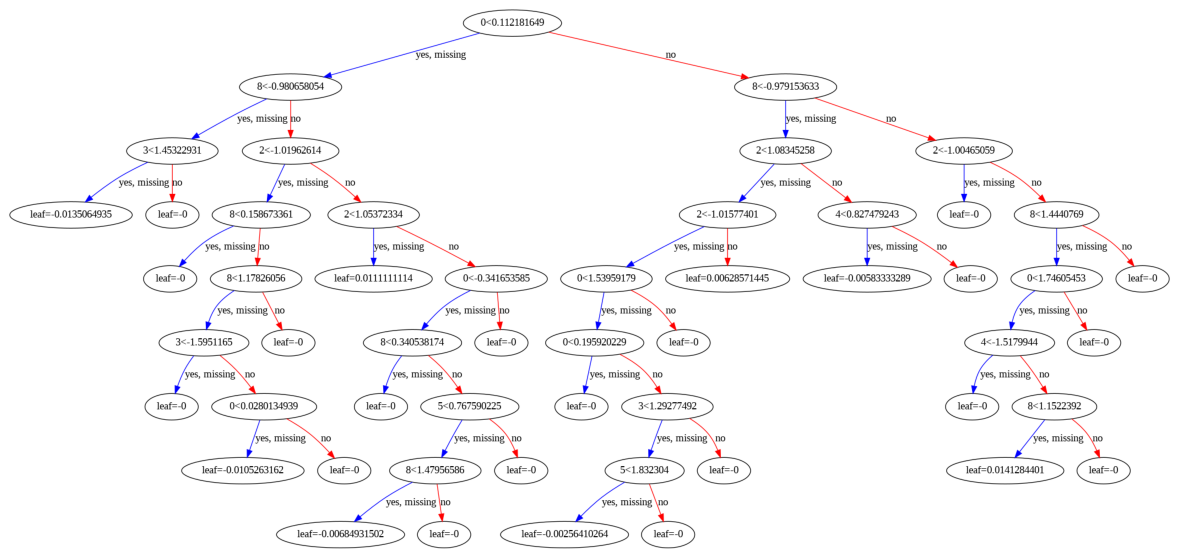

In [ ]:
ax = xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(100, 10)
plt.show()

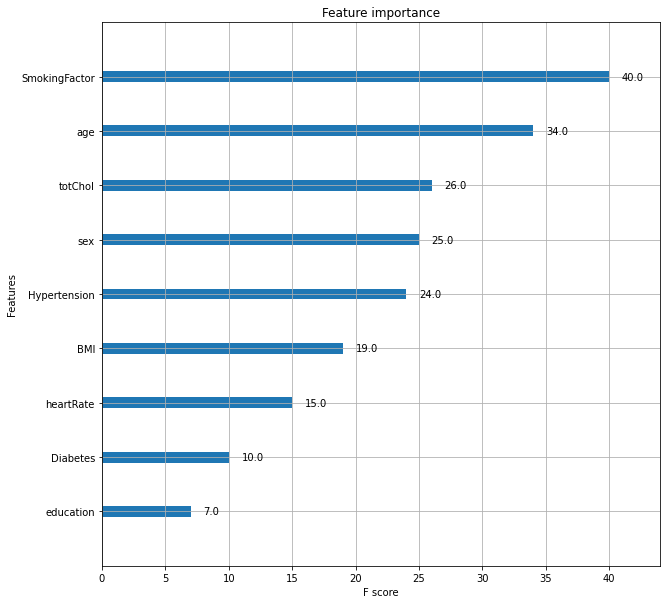

In [ ]:

orig_feature_names = list(df.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()

# **CONCLUSION**

#By selecting alla the accuracies of  the model **gradientboostingclassifier** appears to be best accuracy

The accuracy of KNN : 0.86

The accuracy of Logistic regression : 0.68

the acciracy of decision tree : 0.79

The accuracy of randomforestclassifier : 0.88

the accuracy of XGBoost : 0.83

The accuiracy of gradientboostingclassifier : 0.89